In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
study_time_lst = [5, 2, 12, 8, 15, 10, 11, 17, 7.5, 3]
score_lst = [60, 40, 96, 72, 100, 98, 89, 96, 80, 30]

In [3]:
x_train = np.array(study_time_lst, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

In [4]:
y_train = np.array(score_lst, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [5]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [6]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.001 
epochs = 200

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [7]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [8]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(6142.6475, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 0, loss 6142.6474609375
tensor(3972.9526, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 1, loss 3972.95263671875
tensor(2615.4546, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 2, loss 2615.45458984375
tensor(1766.0901, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 3, loss 1766.090087890625
tensor(1234.6292, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 4, loss 1234.629150390625
tensor(902.0586, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 5, loss 902.05859375
tensor(693.9196, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 6, loss 693.9195556640625
tensor(563.6285, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 7, loss 563.6285400390625
tensor(482.0418, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 8, loss 482.0418395996094
tensor(430.9260, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 9, loss 430.92596435546875
tensor(398.8737, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 10, lo

tensor(331.1331, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 87, loss 331.1330871582031
tensor(330.9509, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 88, loss 330.95086669921875
tensor(330.7687, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 89, loss 330.76873779296875
tensor(330.5868, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 90, loss 330.5867919921875
tensor(330.4050, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 91, loss 330.40496826171875
tensor(330.2233, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 92, loss 330.22332763671875
tensor(330.0418, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 93, loss 330.0418395996094
tensor(329.8605, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 94, loss 329.86053466796875
tensor(329.6793, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 95, loss 329.6792907714844
tensor(329.4983, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 96, loss 329.4983215332031
tensor(329.3174, device='cuda:0', grad_fn=<MseLossBackw

tensor(316.0022, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 173, loss 316.0021667480469
tensor(315.8326, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 174, loss 315.83258056640625
tensor(315.6631, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 175, loss 315.6630859375
tensor(315.4937, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 176, loss 315.4937438964844
tensor(315.3245, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 177, loss 315.32452392578125
tensor(315.1555, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 178, loss 315.15545654296875
tensor(314.9865, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 179, loss 314.9865417480469
tensor(314.8177, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 180, loss 314.8177185058594
tensor(314.6491, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 181, loss 314.64910888671875
tensor(314.4807, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 182, loss 314.48065185546875
tensor(314.3123, device='cuda:0', grad_fn=<MseLo

In [9]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 40.21086 ]
 [ 18.37832 ]
 [ 91.15345 ]
 [ 62.0434  ]
 [112.98599 ]
 [ 76.59843 ]
 [ 83.87594 ]
 [127.541016]
 [ 58.40464 ]
 [ 25.655834]]


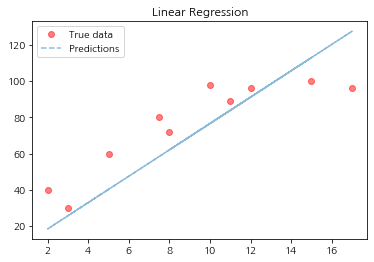

In [13]:
plt.clf()
plt.title("Linear Regression")
plt.plot(x_train, y_train, 'ro', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()